# Dataset: Pairwise GNN approach

Get tracksters from a certain neighbourhood.

Construct a graph of the neighbourgood (or just a binary pair?) based on layer-clusters.

Classify cut-edges based on the node data.
Node data is enriched using message passing.

Maybe it's easier to start with binary pairs - although not computationaly optimal.

Graph:
- linked_inners
    - nodes linked to the given tracksters within its cone


In [25]:
import uproot
import numpy as np
import awkward as ak
import networkx as nx

import matplotlib.pyplot as plt

from reco.event import get_candidate_pairs
from reco.graphs import create_graph
from reco.dataset import match_trackster_pairs

from reco.plotting import plot_graph_3D


plt.style.use('seaborn-whitegrid')

file_name = "~/Data/multi/new_ntuples_14992862_991.root"
tracksters = uproot.open({file_name: "ticlNtuplizer/tracksters"})
simtracksters = uproot.open({file_name: "ticlNtuplizer/simtrackstersSC"})
graphs = uproot.open({file_name: "ticlNtuplizer/graph"})
associations = uproot.open({file_name: "ticlNtuplizer/associations"})

In [35]:
eid = 0

c_pairs, dst_map = get_candidate_pairs(tracksters, graphs, eid, max_distance=15)

gt_pairs = match_trackster_pairs(
    tracksters,
    simtracksters,
    associations,
    eid,
    energy_threshold=20,
    distance_threshold=15,
)

build supergraph

In [36]:
vx = tracksters["vertices_x"].array()[eid]
vy = tracksters["vertices_y"].array()[eid]
vz = tracksters["vertices_z"].array()[eid]
ve = tracksters["vertices_energy"].array()[eid]
vi = tracksters["vertices_indexes"].array()[eid]


ca, cb, _ = gt_pairs[2] # c_pairs for candidate pairs

ca_lc = set(vi[ca])
cb_lc = set(vi[cb])

cvx = ak.flatten([vx[ca], vx[cb]])
cvy = ak.flatten([vy[ca], vy[cb]])
cvz = ak.flatten([vz[ca], vz[cb]])
cve = ak.flatten([ve[ca], ve[cb]])
cvi = ak.flatten([vi[ca], vi[cb]])

G = create_graph(cvx, cvy, cvz, cve, cvi, N=1)

for edge in G.edges:
    a, b = edge
    ai = G.nodes[a]["index"]
    bi = G.nodes[b]["index"]
    if (ai in ca_lc and bi in cb_lc) or (bi in ca_lc and ai in cb_lc):
        G.edges[edge]["color"] = "green"
        

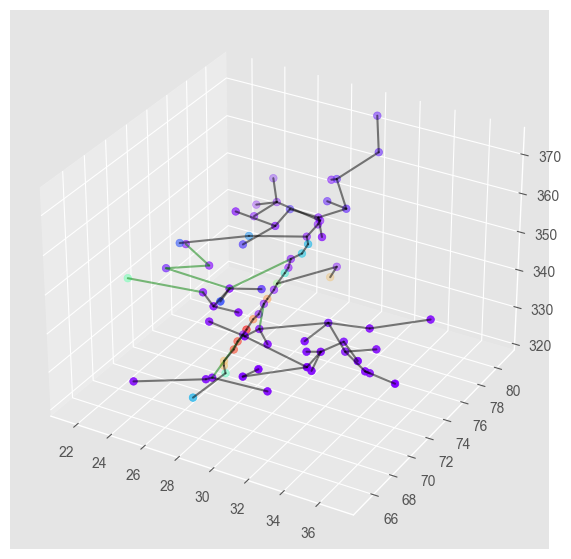

In [37]:
plot_graph_3D(G, cve)